In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

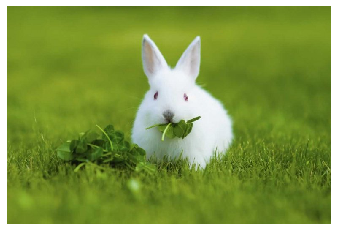

In [177]:
import cv2
img = cv2.imread('rabit.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

In [64]:
X = img.reshape((-1,3))
print(X.shape)

(396288, 3)


In [73]:
# Use KMeans 
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [74]:
centers = km.cluster_centers_
print(centers)

[[115.71194787 142.63154005  36.11401553]
 [218.45595909 226.48584151 229.27175955]
 [ 84.04587928 110.3370611   26.91691082]
 [156.18945326 173.87388261 150.60668006]]


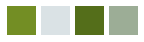

In [75]:
colors = []

for i,color in enumerate(centers):
    plt.subplot(1,10,i+1)
    m = np.zeros((100,100,3),dtype='uint8')
    m[:,:,:] = color
    plt.imshow(m)
    plt.axis("off")
plt.show()

In [76]:
zero_out = [0,2]
for i in zero_out:
    centers[i] = np.array([0,0,0])

In [77]:
new_img = centers[km.labels_]

In [87]:
new_img = new_img.reshape(img.shape)

In [90]:
new_img[new_img[:,:,:]>0] = 1

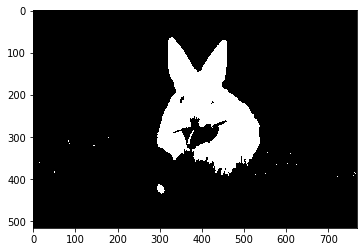

In [91]:
plt.imshow(new_img)
plt.show()

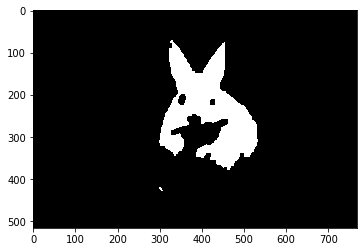

In [178]:
#closing = cv2.morphologyEx(new_img, cv2.MORPH_CLOSE, kernel,iterations=3)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(new_img,kernel,iterations = 2)

plt.imshow(erosion)
kernel = np.ones((5,5),np.uint8)
closing = cv2.dilate(erosion,kernel,iterations = 5)

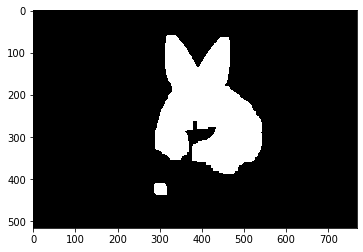

In [179]:
plt.imshow(closing)
plt.show()

In [180]:
final_img = img
final_img[closing[:,:,:]==0] = 255